# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [1]:
bcsc<-read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",")

In [2]:
bcscDuplicated <- rep(row.names(bcsc), bcsc$count)

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [3]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
N <- 5000
indexes <- sample(bcscDuplicated,N)

sampled <- bcsc[indexes,]

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [4]:
columns <- c("race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")
sub <- sampled[, columns]
sub[sub == 9] <- NA
sampled[, columns] <- sub[, columns]

In [5]:
age <- c("18-29","30-34", "35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85+")


sampled$biophx<-factor(sampled$biophx,labels = c("NO","YES"))
sampled$breast_cancer_history<-factor(sampled$breast_cancer_history,labels = c("NO","YES"))
sampled$first_degree_hx<-factor(sampled$first_degree_hx,labels = c("NO","YES"))
sampled$current_hrt<-factor(sampled$current_hrt,labels = c("NO","YES"))
sampled$race_eth<-factor(sampled$race_eth,labels = c("Non-Hispanic white","Non-Hispanic black", "Asian/Pacific Islander", "Native American", "Hispanic", "Other/mixed"))
sampled$BIRADS_breast_density<-factor(sampled$BIRADS_breast_density,labels = c("Almost entirely fat","Scattered fibroglandular densities", "Heterogeneously dense", "Extremely dense"))
sampled$menopaus<-factor(sampled$menopaus,labels = c("Pre- or peri-menopausal","Post-menopausal", "Surgical menopause"))
sampled$age_group_5_years<-factor(sampled$age_group_5_years,labels = age)
sampled$age_menarche<-factor(sampled$age_menarche,labels = c(">14", "12-13", "<12"))
sampled$age_first_birth<-factor(sampled$age_first_birth,labels = c("<20", "20-24", "25-29", ">30", "Nulliparous"))


summary(sampled)

      year      age_group_5_years                   race_eth    first_degree_hx
 Min.   :2000   50-54  : 852      Non-Hispanic white    :3331   NO  :3774      
 1st Qu.:2002   45-49  : 738      Non-Hispanic black    : 268   YES : 737      
 Median :2004   55-59  : 720      Asian/Pacific Islander: 384   NA's: 489      
 Mean   :2004   40-44  : 653      Native American       :  26                  
 3rd Qu.:2007   60-64  : 544      Hispanic              : 327                  
 Max.   :2009   65-69  : 448      Other/mixed           :  55                  
                (Other):1045      NA's                  : 609                  
 age_menarche    age_first_birth                        BIRADS_breast_density
 >14  : 453   <20        : 351   Almost entirely fat               : 297     
 12-13: 760   20-24      : 614   Scattered fibroglandular densities:1665     
 <12  : 476   25-29      : 383   Heterogeneously dense             :1451     
 NA's :3311   >30        : 354   Extremely dense

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [7]:
ageVectors <-c(24, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87)
sampled$age<-ageVectors[sampled$age_group_5_years]

omittedNASampled <- sampled[!is.na(sampled$first_degree_hx),]

In [23]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(data=omittedNASampled,aes(x=first_degree_hx, y=age,color=first_degree_hx))+geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [24]:

age_first_degree_hx <- sampled[!is.na(sampled$first_degree_hx) & sampled$first_degree_hx == 'YES', c("age_group_5_years", "age")]
age_no_first_degree_hx <- sampled[!is.na(sampled$first_degree_hx) & sampled$first_degree_hx == 'NO', c("age_group_5_years", "age")]


age_degree_hx <- sampled[!is.na(sampled$first_degree_hx), ]

paste("Las muestras de edad cuando hay antecendentes familiares NO sigue una distribución gaussiana. pvalor:",
          shapiro.test(age_degree_hx$age[age_degree_hx$first_degree_hx=="YES"])$p.value)
paste("Las muestras de edad cuando NO hay antecendentes familiares NO sigue una distribución gaussiana. pvalor:",
          shapiro.test(age_degree_hx$age[age_degree_hx$first_degree_hx=="NO"])$p.value)


wilcox.test(age~first_degree_hx, data=age_degree_hx)


[1] "Las muestras de edad cuando hay antecendentes familiares NO sigue una distribución gaussiana. pvalor: 4.48087454231314e-11"

[1] "Las muestras de edad cuando NO hay antecendentes familiares NO sigue una distribución gaussiana. pvalor: 4.54082851719025e-31"


	Wilcoxon rank sum test with continuity correction

data:  age by first_degree_hx
W = 1239200, p-value = 2.339e-06
alternative hypothesis: true location shift is not equal to 0


Puesto que no siguen una distribución gaussiana, es preciso realiar el test Wilcoxon-Mann-Whitney. Se obtiene un p-valor muy bajo, por lo que podemos determinar que sí existe una diferencia estadística

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

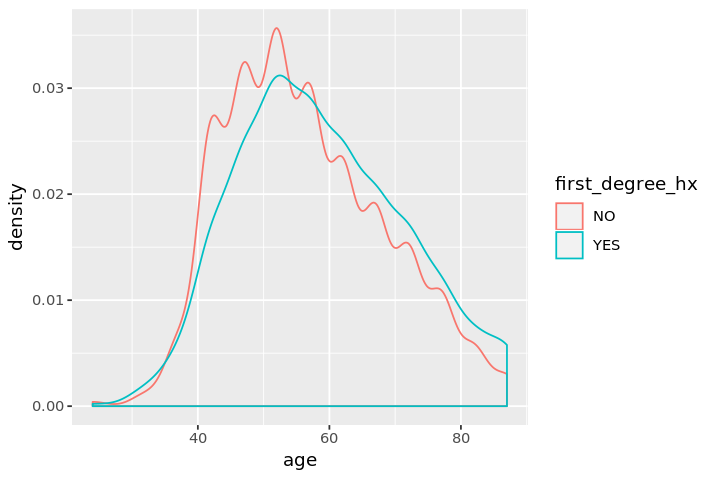

In [25]:
first_degree_hx <- sampled[!is.na(sampled$first_degree_hx), ]

ggplot(data=first_degree_hx, aes(x=age, color=first_degree_hx))+geom_density()


#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

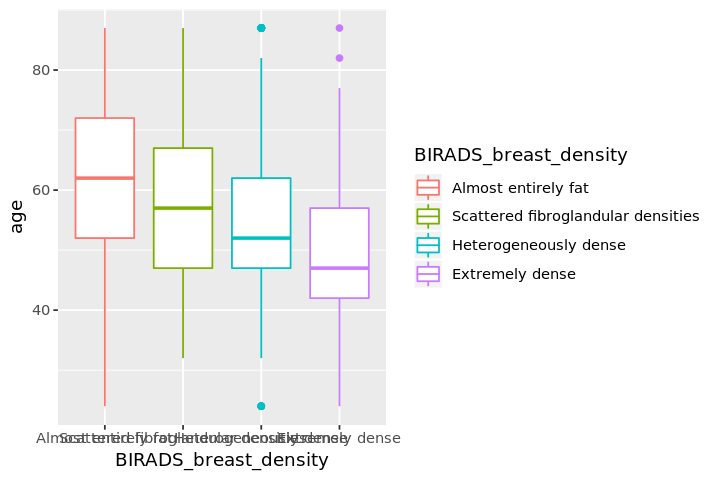

In [26]:
birads <- sampled[!is.na(sampled$BIRADS_breast_density),]

ggplot(data=birads,aes(x=BIRADS_breast_density, y=age,color=BIRADS_breast_density))+geom_boxplot()

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?


¿Que test habría que aplicar?

Puesto que se quiere determinar si existe diferencia estadística en cuatro grupos, es previso realizar un test de ANOVA. Suponemos distintas varianzas


In [30]:
oneway.test(age ~ BIRADS_breast_density, data=birads)


	One-way analysis of means (not assuming equal variances)

data:  age and BIRADS_breast_density
F = 60.558, num df = 3.00, denom df = 771.29, p-value < 2.2e-16


El p-valor es realmente bajo, por lo que podemos rechazar la hipótesis nula. Esto significa que si existe una diferencia estadística

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

Se quiere comprobar si la distribución de datos es homogenea, para ello se usa el test chi cuadrado de Pearson

In [32]:
birads <- sampled[!is.na(sampled$BIRADS_breast_density), ]
birads_count <- table(birads$BIRADS_breast_density)

cqt <- chisq.test(birads_count)
cqt


	Chi-squared test for given probabilities

data:  birads_count
X-squared = 1816.3, df = 3, p-value < 2.2e-16


Es un valor bajo, lo cual NO se puede asumair la hipotesis nulas, y por lo tanto no son iguales de probables

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?


               Almost entirely fat Scattered fibroglandular densities 
                        0.08094849                         0.45380213 
             Heterogeneously dense                    Extremely dense 
                        0.39547561                         0.06977378 

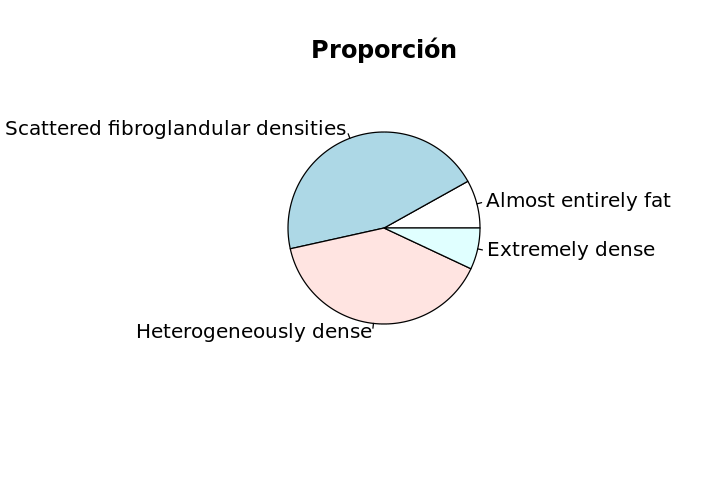

In [35]:
p <- birads_count/sum(birads_count)
p
lbls <-names(birads_count)
pie(p, labels = lbls, main="Proporción")

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [37]:
birads_first_degree_hx <- sampled[!is.na(sampled$BIRADS_breast_density) & !is.na(sampled$first_degree_hx), ]
birads_yes_first_degree_hx <- birads_first_degree_hx[birads_first_degree_hx$first_degree_hx == "YES",]
birads_no_first_degree_hx <- birads_first_degree_hx[birads_first_degree_hx$first_degree_hx == "NO",]

birads_yes_count <- table(birads_yes_first_degree_hx$BIRADS_breast_density)
birads_no_count <- table(birads_no_first_degree_hx$BIRADS_breast_density)


M <- as.table(rbind(birads_yes_count, birads_no_count))
rownames(M) <-  c("YES", "NO")


cqt<- chisq.test(M)
cqt$p.value

[1] 0.235952

Se ha realziado un test de independencia, y puesto que el valor optenido es bajo, se puede determinar que sí existen diferencias entre sí ha habido o no antencedentes familiares

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [39]:
birads_race_eth <- sampled[!is.na(sampled$BIRADS_breast_density) & !is.na(sampled$race_eth), c("race_eth", "BIRADS_breast_density")]

tblres<-table(birads_race_eth)

tblres

chisq.test(tblres)


                        BIRADS_breast_density
race_eth                 Almost entirely fat Scattered fibroglandular densities
  Non-Hispanic white                     204                               1208
  Non-Hispanic black                      23                                100
  Asian/Pacific Islander                  11                                 51
  Native American                          1                                  7
  Hispanic                                26                                 98
  Other/mixed                              2                                 19
                        BIRADS_breast_density
race_eth                 Heterogeneously dense Extremely dense
  Non-Hispanic white                      1021             179
  Non-Hispanic black                        92              11
  Asian/Pacific Islander                    85              29
  Native American                            6               3
  Hispanic                       

Warning message in chisq.test(tblres):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tblres
X-squared = 48.684, df = 15, p-value = 1.971e-05


Se ha realziado un test de independencia, y puesto que el valor optenido es bajo, se puede determinar que sí existen diferencias entre el tipo de cáncer y el grupo étnico

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA